In [61]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly .express as px
pd.options.display.max_rows=100000
pd.options.display.max_columns=1000
df=pd.read_csv('salesreport.csv')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           67 non-null     object 
 1   CUSTOMER NAME  65 non-null     object 
 2   LOCATION       68 non-null     object 
 3   PRODUCT        67 non-null     object 
 4   January        56 non-null     float64
 5   February       55 non-null     float64
 6   March          57 non-null     float64
 7   April          57 non-null     float64
 8   May            56 non-null     float64
 9   June           57 non-null     object 
dtypes: float64(5), object(5)
memory usage: 6.5+ KB


In [63]:
df.head()

,AREA,CUSTOMER NAME,LOCATION,PRODUCT,January,February,March,April,May,June
0,AB,Davidson,ABA,Sanitizer,NaN,NaN,NaN,NaN,NaN,
1,AB,Aku Resources,ABA,Perfume,19969353.68,35160366.85,36010006.80,19881860.60,33631310.03,36330943.96
2,AB,CHRIS AMANI,YENAGOA,Perfume,8583913.81,10011801.80,10131638.63,8433011.19,NaN,10661931.69
3,AB,DIVINE SUCCESS,ABA,Sanitizer,18910910.89,36016316.91,36860311.60,18860416.91,33101641.63,34404490.66
4,ON,Tony ng Pampcos,BENIN,Spray,16188135.63,18888910.11,19183586.66,16081199.39,10518619.93,19689915.83


In [64]:
df.isnull().sum()

AREA             14
CUSTOMER NAME    16
LOCATION         13
PRODUCT          14
January          25
February         26
March            24
April            24
May              25
June             24
dtype: int64

In [65]:
a=df['January'].mean()
b=df['February'].mean()
c=df['March'].mean()
d=df['April'].mean()
df['May']=pd.to_numeric(df['April'], errors='coerce')
e=df['May'].mean()
df['June']=pd.to_numeric(df['April'], errors='coerce')
f=df['June'].mean()
df['January'].fillna(a, inplace=True)
df['February'].fillna(b,inplace=True)
df['March'].fillna(c, inplace=True)
df['April'].fillna(d, inplace=True)
df['May'].fillna(e, inplace=True)
df['June'].fillna(f, inplace=True)
df.loc[6, "AREA"]="ON"
df.loc[39, "AREA"]="AB"
df.loc[7, "CUSTOMER NAME"]="Ade"
df.loc[28, "CUSTOMER NAME"]="Ade"
df.loc[54, "CUSTOMER NAME"]="Ade"
df.loc[42, "CUSTOMER NAME"]="Ade"
df.loc[40, "LOCATION"]="PORT HARCOURT"
df.loc[32, "PRODUCT"]="Airfreshner"
df.loc[37, "PRODUCT"]="Spray"
df.dropna (inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10416\3228858903.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\USER\AppData\Local\Temp\ipykernel_10416\3228858903.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [66]:
a=df.groupby("AREA")["January"].sum().sort_values(ascending=False)
b=df.groupby("AREA")["February"].sum().sort_values(ascending=False)
c=df.groupby("AREA")["March"].sum().sort_values(ascending=False)
d=df.groupby("AREA")["April"].sum().sort_values(ascending=False)
e=df.groupby("AREA")["May"].sum().sort_values(ascending=False)
df["June"]=pd.to_numeric(df["June"], errors="coerce")
f=df.groupby("AREA")["June"].sum().sort_values(ascending=False)

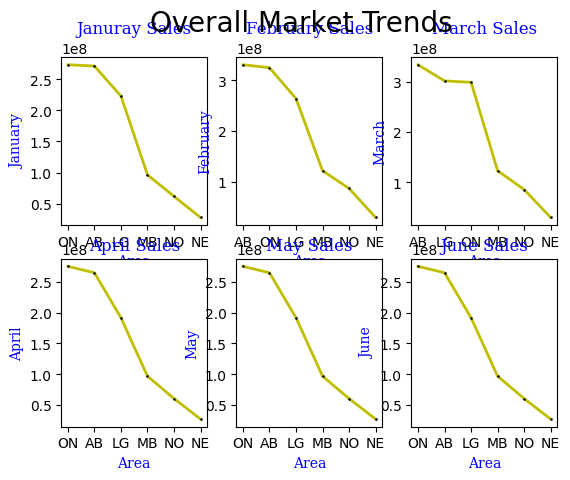

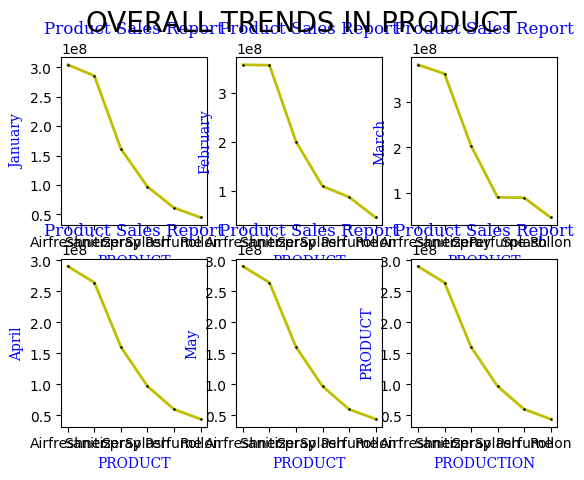

In [67]:
plt.subplot(2,3,1)
plt.plot(a, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Januray Sales', fontdict=font1, size=12)
plt.xlabel('Area', fontdict=font2)
plt.ylabel('January', fontdict=font3)

plt.subplot(2,3,2)
plt.plot(b, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('February Sales', fontdict=font1, size=12)
plt.xlabel('Area', fontdict=font2)
plt.ylabel('February', fontdict=font3)

plt.subplot(2,3,3)
plt.plot(c, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('March Sales', fontdict=font1, size=12)
plt.xlabel('Area', fontdict=font2)
plt.ylabel('March', fontdict=font3)

plt.subplot(2,3,4)
plt.plot(d, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('April Sales', fontdict=font1, size=12)
plt.xlabel('Area', fontdict=font2)
plt.ylabel('April', fontdict=font3)

plt.subplot(2,3,5)
plt.plot(e, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('May Sales', fontdict=font1, size=12)
plt.xlabel('Area', fontdict=font2)
plt.ylabel('May', fontdict=font3)

plt.subplot(2,3,6)
plt.plot(f, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('June Sales', fontdict=font1, size=12)
plt.xlabel('Area', fontdict=font2)
plt.ylabel('June', fontdict=font3)
plt.suptitle("Overall Market Trends", size=20)
plt.show()

a=df.groupby("PRODUCT")["January"].sum().sort_values(ascending=False)
b=df.groupby("PRODUCT")["February"].sum().sort_values(ascending=False)
c=df.groupby("PRODUCT")["March"].sum().sort_values(ascending=False)
d=df.groupby("PRODUCT")["April"].sum().sort_values(ascending=False)
e=df.groupby("PRODUCT")["May"].sum().sort_values(ascending=False)
df["June"]=pd.to_numeric(df["June"], errors="coerce")
f=df.groupby("PRODUCT")["June"].sum().sort_values(ascending=False)
# print(a,b,c,d,e,f)

plt.subplot(2,3,1)
plt.plot(a, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Product Sales Report', fontdict=font1, size=12)
plt.xlabel('PRODUCT', fontdict=font2)
plt.ylabel('January', fontdict=font3)

plt.subplot(2,3,2)
plt.plot(b, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Product Sales Report', fontdict=font1, size=12)
plt.xlabel('PRODUCT', fontdict=font2)
plt.ylabel('February', fontdict=font3)

plt.subplot(2,3,3)
plt.plot(c, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Product Sales Report', fontdict=font1, size=12)
plt.xlabel('PRODUCT', fontdict=font2)
plt.ylabel('March', fontdict=font3)

plt.subplot(2,3,4)
plt.plot(d, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Product Sales Report', fontdict=font1, size=12)
plt.xlabel('PRODUCT', fontdict=font2)
plt.ylabel('April', fontdict=font3)

plt.subplot(2,3,5)
plt.plot(e, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Product Sales Report', fontdict=font1, size=12)
plt.xlabel('PRODUCT', fontdict=font2)
plt.ylabel('May', fontdict=font3)

plt.subplot(2,3,6)
plt.plot(f, color='y', marker='3', ms=2, lw=2, mec='k', mfc='b')
font1={'family':'serif', 'color':'b', 'size':'15'}
font2={'family':'serif', 'color':'b'}
font3={'family':'serif', 'color':'b'}
plt.title('Product Sales Report', fontdict=font1, size=12)
plt.xlabel('PRODUCTION', fontdict=font2)
plt.ylabel('PRODUCT', fontdict=font3)
plt.suptitle("OVERALL TRENDS IN PRODUCT", size=20)
plt.show()


In [ ]:
correlation_matrix= df.corr(numeric_only=True)


In [69]:
print(correlation_matrix)

           January  February     March     April       May      June
January   1.000000  0.953180  0.920422  0.976628  0.976628  0.976628
February  0.953180  1.000000  0.966306  0.938318  0.938318  0.938318
March     0.920422  0.966306  1.000000  0.888862  0.888862  0.888862
April     0.976628  0.938318  0.888862  1.000000  1.000000  1.000000
May       0.976628  0.938318  0.888862  1.000000  1.000000  1.000000
June      0.976628  0.938318  0.888862  1.000000  1.000000  1.000000


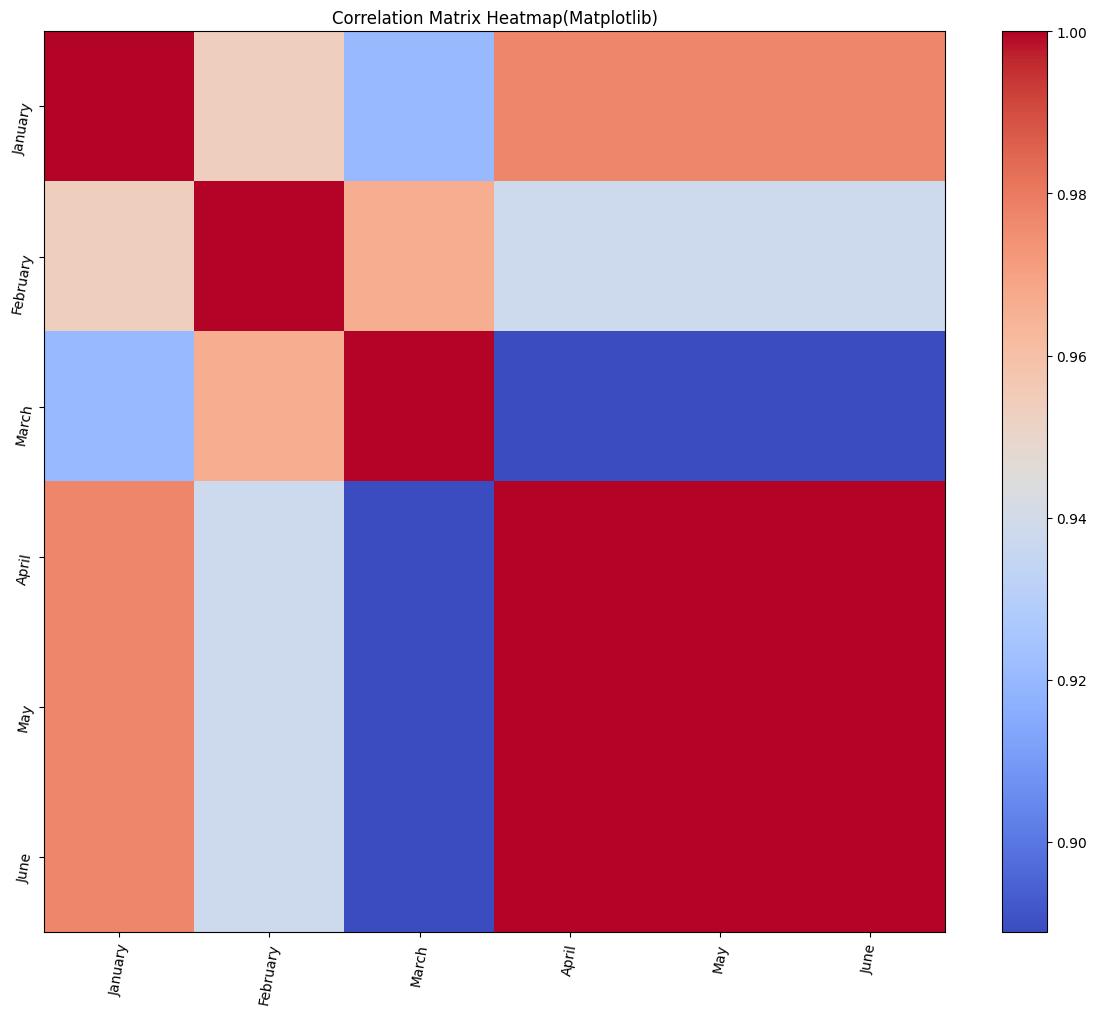

In [80]:
# CORRELATION MATRIX HEATMAP(MATPLOTLIB)
plt.figure(figsize=(12,10))
plt.imshow(correlation_matrix, cmap='coolwarm',interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)),correlation_matrix.columns, rotation=80)
plt.yticks(range(len(correlation_matrix)),correlation_matrix.columns, rotation=80)
plt.title("Correlation Matrix Heatmap(Matplotlib)")
plt.tight_layout()
plt.show()



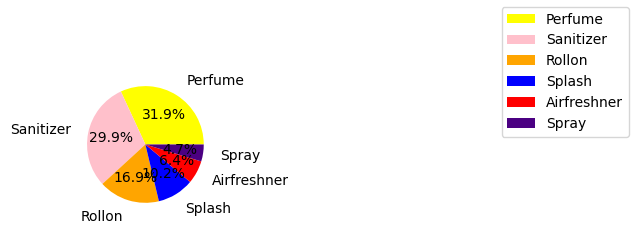

In [71]:
a=df.groupby('PRODUCT')["January"].sum().sort_values(ascending=False)
x=pd.array(a)
thelabel=pd.array(df["PRODUCT"])
myset=set(thelabel)
newlabel=myset
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'blue','size':20}
mycolor=pd.array(['yellow','pink','orange','blue','red','indigo'])
plt.subplot(2,3,1)
plt.pie(x, labels=newlabel,colors=mycolor, autopct='%1.1f%%',labeldistance=1.3,pctdistance=0.6)
plt.figlegend()

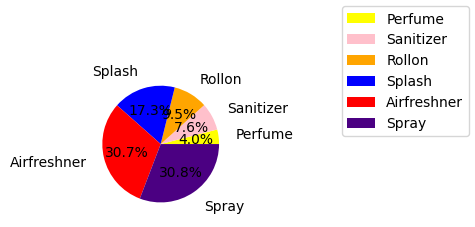

In [72]:
b=df.groupby("PRODUCT")["February"].sum().sort_values(ascending=True)
x=pd.array(b)
thelabel=pd.array(df["PRODUCT"])
myset=set(thelabel)
newlabel=myset
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'blue','size':20}
mycolor=pd.array(['yellow','pink','orange','blue','red','indigo'])
plt.subplot(2,3,2)
plt.pie(x, labels=newlabel, colors=mycolor, autopct='%1.1f%%',labeldistance=1.3, pctdistance=0.6)
plt.figlegend()

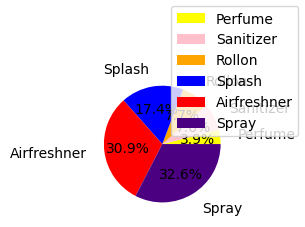

In [73]:
c=df.groupby("PRODUCT")["March"].sum().sort_values(ascending=True)
x=pd.array(c)
thelabel=pd.array(df["PRODUCT"])
myset=set(thelabel)
newlabel=myset
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'blue','size':20}
mycolor=pd.array(['yellow','pink','orange','blue','red','indigo'])
plt.subplot(2,3,3)
plt.pie(x, labels=newlabel, colors=mycolor, autopct='%1.1f%%',labeldistance=1.3, pctdistance=0.6)
plt.figlegend()

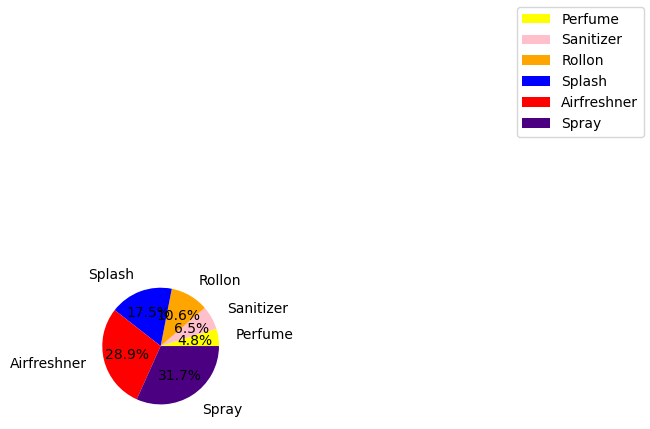

In [74]:
d=df.groupby("PRODUCT")["April"].sum().sort_values(ascending=True)
x=pd.array(d)
thelabel=pd.array(df["PRODUCT"])
myset=set(thelabel)
newlabel=myset
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'blue','size':20}
mycolor=pd.array(['yellow','pink','orange','blue','red','indigo'])
plt.subplot(2,3,4)
plt.pie(x, labels=newlabel, colors=mycolor, autopct='%1.1f%%',labeldistance=1.3, pctdistance=0.6)
plt.figlegend()


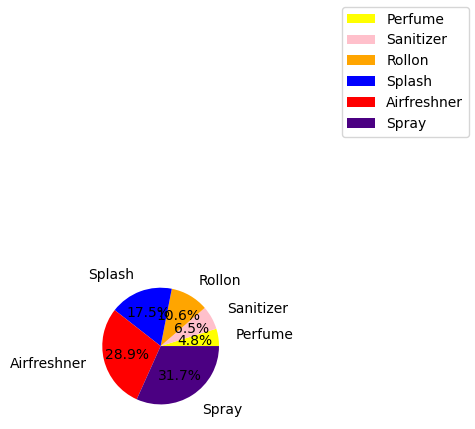

In [75]:
e=df.groupby("PRODUCT")["May"].sum().sort_values(ascending=True)
x=pd.array(e)
thelabel=pd.array(df["PRODUCT"])
myset=set(thelabel)
newlabel=myset
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'blue','size':20}
mycolor=pd.array(['yellow','pink','orange','blue','red','indigo'])
plt.subplot(2,3,5)
plt.pie(x, labels=newlabel, colors=mycolor, autopct='%1.1f%%',labeldistance=1.3, pctdistance=0.6)
plt.figlegend()

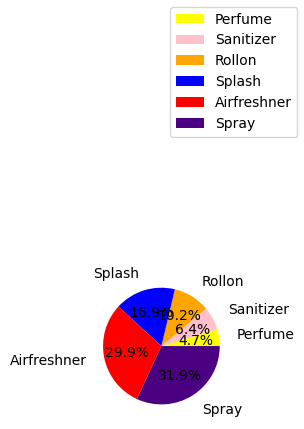

In [76]:
f=df.groupby("PRODUCT")["January"].sum().sort_values(ascending=True)
x=pd.array(f)
thelabel=pd.array(df["PRODUCT"])
myset=set(thelabel)
newlabel=myset
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'blue','size':20}
mycolor=pd.array(['yellow','pink','orange','blue','red','indigo'])
plt.subplot(2,3,6)
plt.pie(x, labels=newlabel, colors=mycolor, autopct='%1.1f%%',labeldistance=1.3, pctdistance=0.6)
plt.figlegend()
plt.show()


In [77]:
# HISTOGRAM (PLOTLY)
fig_hist = px.histogram(df, x='PRODUCT', title='Distribution of Products(Plotly)')
fig_hist.show()


In [78]:
# HISTOGRAM (PLOTLY)
fig_hist = px.histogram(df, x='PRODUCT', title='Distribution of Products(Plotly)',marginal='box')
fig_hist.show()